## 풍속을 뽑는 기준

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from tqdm import tqdm

In [84]:
b1 = pd.read_csv("./data/train_data_preprocess.csv")

TurbList = []
for i in (sorted(pd.unique(b1["TurbID"]))):
    tmp = b1[b1["TurbID"] == i]
    tmp.reset_index(inplace=True,drop=True)
    tmp.reset_index(inplace=True)
    TurbList.append(tmp)

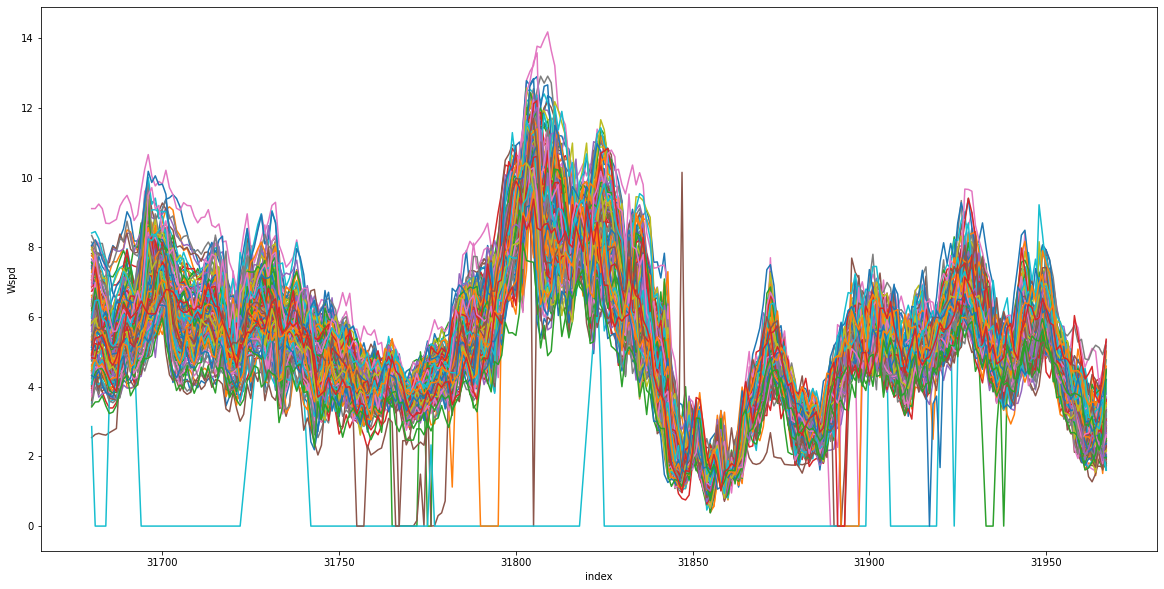

In [85]:
plt.figure(figsize=(20,10))
for i in TurbList[:]:
    tp = i[i["Day"]==221].index[0]
    t = i[tp:tp+144]   
    tp2 = i[i["Day"]==222].index[0]
    t2 = i[tp2:tp2+144]
    tp = pd.concat([t,t2])
    tp = tp.fillna(method = 'bfill')
    sns.lineplot(x='index', y='Wspd', data=tp, ci=None)
plt.show()

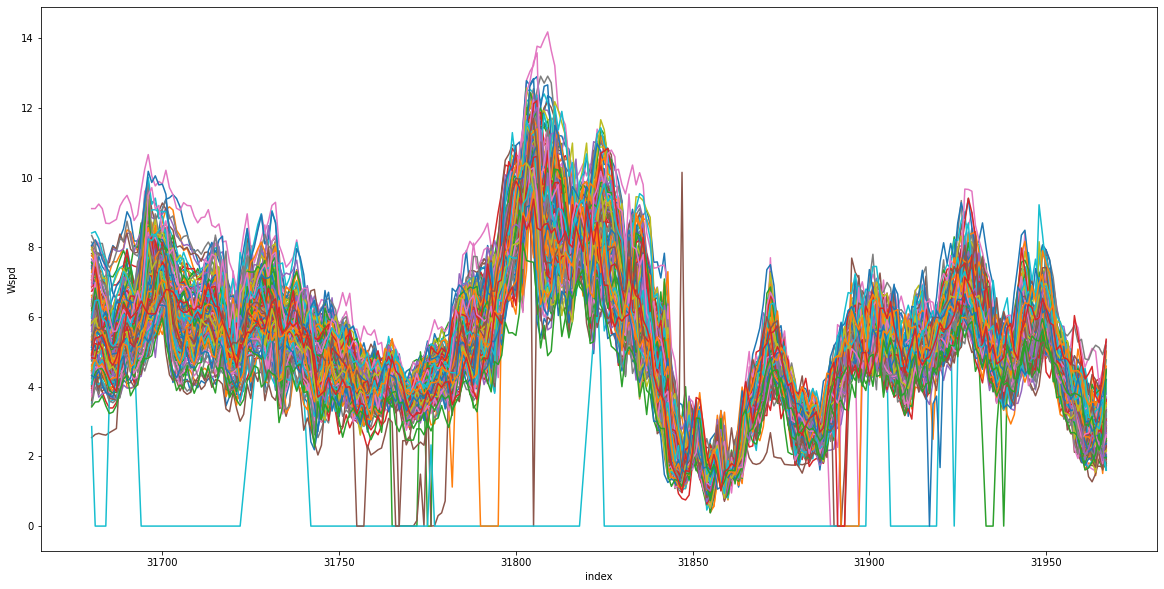

In [86]:
plt.figure(figsize=(20,10))
for i in TurbList[:]:
    tp = i[i["Day"]==221].index[0]
    t = i[tp:tp+144]   
    tp2 = i[i["Day"]==222].index[0]
    t2 = i[tp2:tp2+144]
    tp = pd.concat([t,t2])
    tp = tp.fillna(method = 'bfill')
    sns.lineplot(x='index', y='Wspd', data=tp, ci=None)
plt.show()

In [152]:
Wspd_median = []
Wspd_mean = []
Wspd_quantile = [] #0.7 nan except
for d in tqdm(range(216,223)): #7일
    for t in range(144):
        t1 = b1[b1.Day == d]
        t2 = t1[t1.Tmstamp == t]
        Wspd_median.append(t2.Wspd.median())
        Wspd_mean.append(t2.Wspd.mean())
        Wspd_quantile.append(t2.Wspd.quantile(q=0.7))

100%|██████████| 7/7 [00:08<00:00,  1.27s/it]


In [153]:
df_med = {"Wspd_median":Wspd_median}
df_med = pd.DataFrame(df_med)

df_mean = {"Wspd_median":Wspd_mean}
df_mean = pd.DataFrame(df_mean)

df_quantile = {"Wspd_median":Wspd_quantile}
df_quantile = pd.DataFrame(df_quantile)

In [154]:
def RMSE_MAE(y_true,y_pred):
    mse1 = np.mean(np.square((y_true - y_pred)))
    mae1 = np.mean(np.abs((y_true - y_pred)))
    # print("rmse : ",np.sqrt(mse1))
    # print("mae : ",mae1)
    
    return (np.sqrt(mse1) + mae1) / 2

In [155]:
k = 99999999
m = 0
y_true = df_med.to_numpy().reshape(-1)
for i in range(1, 135):
    tur = b1[b1['TurbID']==i][-144*7:]['Wspd']
    tur = tur.to_numpy()
    tur = tur.reshape(-1)
    m = RMSE_MAE(y_true, tur)
    if m < k:
        k = m
        n = i
        # print("score : ",k)
        # print()

In [156]:
print(f'{n}번째 Turbin의 점수: {k}')

102번째 Turbin의 점수: 0.3715601923857351


In [157]:
k = 99999999
m = 0
y_true = df_mean.to_numpy().reshape(-1)
for i in range(1, 135):
    tur = b1[b1['TurbID']==i][-144*7:]['Wspd']
    tur = tur.to_numpy()
    tur = tur.reshape(-1)
    m = RMSE_MAE(y_true, tur)
    if m < k:
        k = m
        n = i
        # print("score : ",k)
        # print()

In [158]:
print(f'{n}번째 Turbin의 점수: {k}')

16번째 Turbin의 점수: 0.3904803888547371


In [159]:
k = 99999999
m = 0
y_true = df_quantile.to_numpy().reshape(-1)
for i in range(1, 135):
    tur = b1[b1['TurbID']==i][-144*7:]['Wspd']
    tur = tur.to_numpy()
    tur = tur.reshape(-1)
    m = RMSE_MAE(y_true, tur)
    if m < k:
        k = m
        n = i
        # print("score : ",k)
        # print()

In [160]:
print(f'{n}번째 Turbin의 점수: {k}')

75번째 Turbin의 점수: 0.397627308506855


중앙값 102T

0.7 분위 75T

평균값 16T

---
위치 시각화

In [162]:
data_position = pd.read_csv("./data/turb_location.csv")

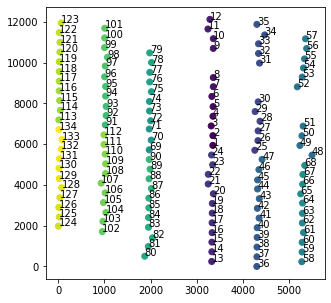

In [163]:
plt.figure(figsize=(5,5))
plt.scatter(data_position['x'], data_position['y'],c=data_position.index)

for i, v in data_position.iterrows():
    plt.text(v[1], v[2]+0.01, i+1)

plt.show()

왼쪽그룹[3줄] 중앙 : 91T

오른쪽그룹[3줄] 중앙 : 25T